Epoch 1/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 2/500
3/3 [==============================] - 0s 1ms/step - loss: 0.4063
Epoch 3/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3973
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 0.3889
Epoch 5/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3803
Epoch 6/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3723
Epoch 7/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3639
Epoch 8/500
3/3 [==============================] - 0s 845us/step - loss: 0.3562
Epoch 9/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 10/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3406
Epoch 11/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3332
Epoch 12/500
3/3 [==============================] - 0s 1ms/step - loss: 0.3260
Epoch 13/500
3/3 [==============================] - 0s 922u

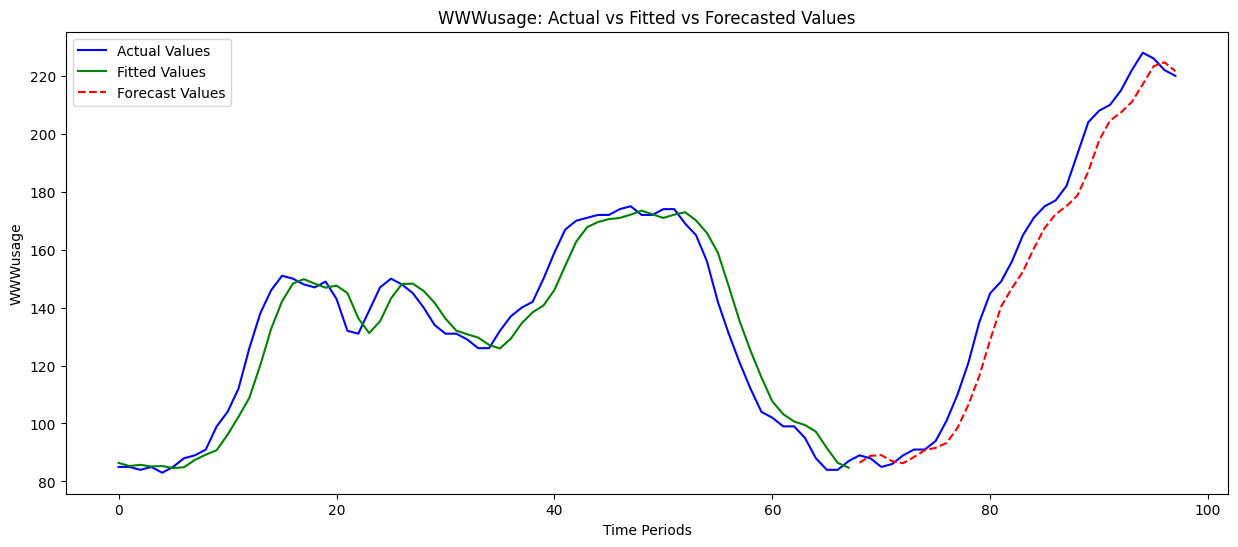

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./data/wwwusage.csv')
WWWusage = df['WWWusage'].values

# Normalize using z-score normalization
train_size = int(len(WWWusage) * 0.7)  # 70% training data
train_data = WWWusage[:train_size]

scaler = StandardScaler()
train_data = train_data.reshape(-1, 1)
scaler.fit(train_data)

WWWusage_normalized = scaler.transform(WWWusage.reshape(-1, 1)).flatten()

# Create input-output pairs for ANN training
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

X, y = create_dataset(WWWusage_normalized)

# Split into train and test
X_train, y_train = X[:train_size-2], y[:train_size-2]
X_test, y_test = X[train_size-2:], y[train_size-2:]

# Define the ANN model
model = Sequential()
model.add(Dense(units=2, input_dim=2, activation='linear'))
model.add(Dense(units=1, activation='linear'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model on the training data
model.fit(X_train, y_train, epochs=500, verbose=1)

# Predict on both train and test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# De-normalize predictions
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)

y_actual_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(np.concatenate([y_actual_train, y_actual_test]), label='Actual Values', color='blue')
plt.plot(np.arange(len(y_actual_train)), y_pred_train, label='Fitted Values', color='green')
plt.plot(np.arange(len(y_actual_train), len(WWWusage)-2), y_pred_test, label='Forecast Values', color='red', linestyle='--')
plt.title("WWWusage: Actual vs Fitted vs Forecasted Values")
plt.xlabel('Time Periods')
plt.ylabel('WWWusage')
plt.legend()
plt.show()
